In [1]:
#Importing the Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore') 

In [2]:
#Loading the csv data to Pandas DataFrame
heart_data=pd.read_csv("Indian Heart Disease Dataset.csv")
heart_data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
heart_data.tail()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1
999,9990855,25,1,0,158,270,0,0,143,1,4.7,0,0,0


In [4]:
#Number of rows and columns in the dataset
heart_data.shape

(1000, 14)

In [5]:
#Getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [6]:
#checking for missing values
heart_data.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [7]:
#Statistical Measures about the data
heart_data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


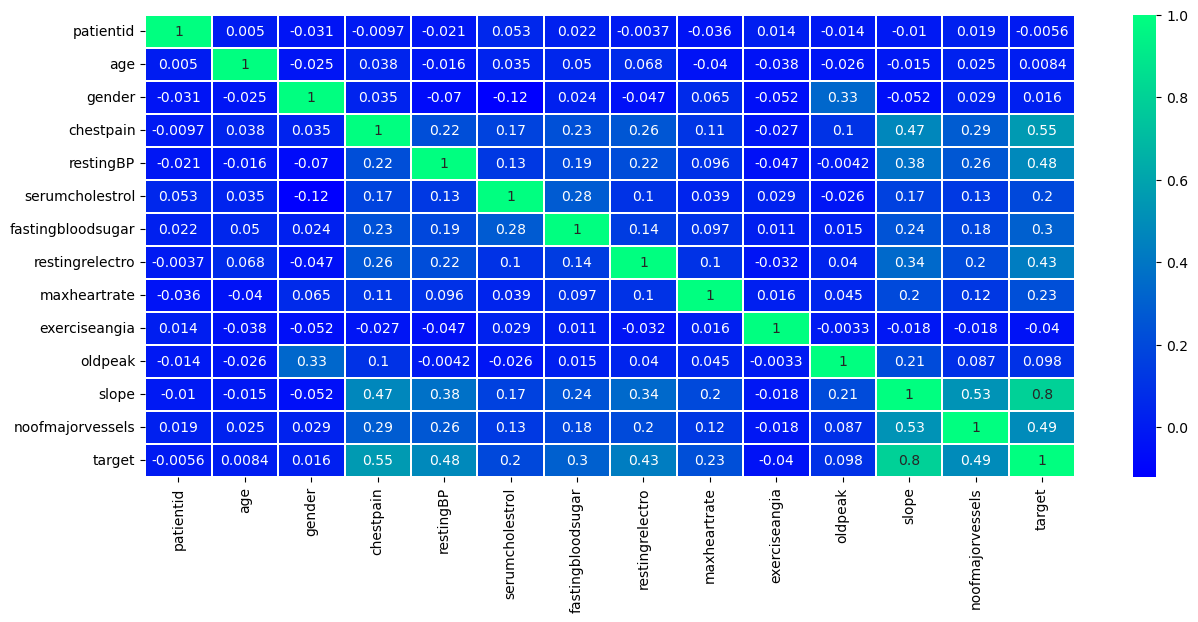

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(heart_data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()

In [10]:
#Checking the distribution of Target Variable
heart_data['target'].value_counts()

1    580
0    420
Name: target, dtype: int64

In [11]:
# 1--> Defective Heart
# 0--> Healthy Heart

In [12]:
#Splitting the Features and the Target 
X=heart_data.drop(["target","patientid"],axis=1)
Y=heart_data["target"]

In [13]:
X

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2
996,47,1,3,143,258,1,1,98,1,5.7,1,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2


In [14]:
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: target, Length: 1000, dtype: int64

In [15]:
#Splitting the data into Training Data and Test Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,
                                               stratify=Y,random_state=2)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(1000, 12) (800, 12) (200, 12)


In [17]:
#Model Training (Logistic Regression)
LR_model=LogisticRegression()
LR_model.fit(X_train,Y_train)

LogisticRegression()

In [18]:
#Model Evaluation
#Calculate Accuracy Score

In [19]:
#Accuracy on training data of Logistic Regression
X_train_prediction_LR=LR_model.predict(X_train)
LR_training_data_accuracy=accuracy_score(X_train_prediction_LR,Y_train)
print("Accuracy on training data of Logistic Regression:",LR_training_data_accuracy)

Accuracy on training data of Logistic Regression: 0.93375


In [20]:
#Accuracy on test data of Logistic Regression
X_test_prediction_LR=LR_model.predict(X_test)
LR_test_data_accuracy=accuracy_score(X_test_prediction_LR,Y_test)
print("Accuracy on test data of Logistic Regression:",LR_test_data_accuracy)

Accuracy on test data of Logistic Regression: 0.94


In [21]:
from sklearn.metrics import classification_report
print("Classification report of Logistic Regression:\n",
      classification_report(Y_test,X_test_prediction_LR))

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        84
           1       0.94      0.96      0.95       116

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [22]:
#Model Training (Decision Tree)
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
#Accuracy on training data of Decison Tree
X_train_prediction_tree=tree_model.predict(X_train)
tree_training_data_accuracy=accuracy_score(X_train_prediction_tree,Y_train)
print("Accuracy on training data of Decison Tree:",tree_training_data_accuracy)

Accuracy on training data of Decison Tree: 0.98375


In [24]:
#Accuracy on test data of Decison Tree
X_test_prediction_tree=tree_model.predict(X_test)
tree_test_data_accuracy=accuracy_score(X_test_prediction_tree,Y_test)
print("Accuracy on test data of Decison Tree:",tree_test_data_accuracy)

Accuracy on test data of Decison Tree: 0.955


In [25]:
print("Classification report of Decison Tree:\n",
      classification_report(Y_test,X_test_prediction_tree))

Classification report of Decison Tree:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        84
           1       0.97      0.96      0.96       116

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



In [26]:
#Model Training (Random Forest)
RF_model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                                max_depth=3,min_samples_split=5)
RF_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       n_estimators=300)

In [27]:
#Accuracy on training data of Random Forest
X_train_prediction_RF=RF_model.predict(X_train)
RF_training_data_accuracy=accuracy_score(X_train_prediction_RF,Y_train)
print("Accuracy on training data of Random Forest:",RF_training_data_accuracy)

Accuracy on training data of Random Forest: 0.9575


In [28]:
#Accuracy on test data of Random Forest
X_test_prediction_RF=RF_model.predict(X_test)
RF_test_data_accuracy=accuracy_score(X_test_prediction_RF,Y_test)
print("Accuracy on test data of Random Forest:",RF_test_data_accuracy)

Accuracy on test data of Random Forest: 0.965


In [31]:
print("Classification report of Random Forest:\n",
      classification_report(Y_test,X_test_prediction_RF))

Classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        84
           1       0.96      0.99      0.97       116

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



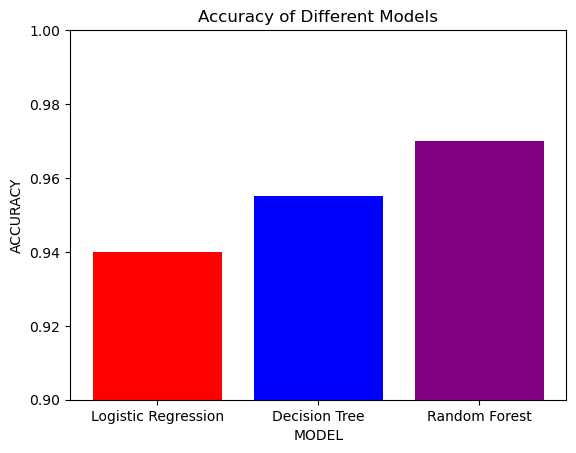

In [54]:
import matplotlib.pyplot as plt

x=['Logistic Regression','Decision Tree','Random Forest']
y=[LR_test_data_accuracy,tree_test_data_accuracy,RF_test_data_accuracy]
plt.bar(x,y,color=["red","blue","purple"])
plt.xlabel("MODEL")
plt.ylabel("ACCURACY")
plt.title("Accuracy of Different Models")
plt.ylim([0.9,1])
plt.show()

In [34]:
#Building Predictive System
age=int(input("Age of the person:"))
sex=int(input("Sex(1 = male; 0 = female):"))
cp=int(input("Describe Chest Pain(0-3):"))
trestbps=int(input("Resting Blood Pressure(in mm)(avg=120):"))
chol=int(input("Cholestoral level (avg=200):"))
fbs=int(input("Is Diabetes level > 120 mg/dl?(1 = true; 0 = false):"))
restecg=int(input("Resting electrocardiographic results (values 0,1,2):"))
thalach=int(input("Maximum heart rate achieved(avg=170):"))
exang=int(input("Exercise induced angina (1 = yes; 0 = no):"))
oldpeak=float(input("ST depression (between 0 & 7):"))
slope=int(input("The slope of ST segment (values 0,1,2):"))
ca=int(input("Number of major vessels (0-4) colored by flourosopy:"))

input_data=(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca)
input_data

#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=RF_model.predict(input_data_reshaped)


if (prediction) ==0:
    print("\n\nThe person does not have heart diesease")
else:
    print("\n\nThe person has heart Disease ")


Age of the person:78
Sex(1 = male; 0 = female):1
Describe Chest Pain(0-3):3
Resting Blood Pressure(in mm)(avg=120):130
Cholestoral level (avg=200):230
Is Diabetes level > 120 mg/dl?(1 = true; 0 = false):1
Resting electrocardiographic results (values 0,1,2):2
Maximum heart rate achieved(avg=170):180
Exercise induced angina (1 = yes; 0 = no):1
ST depression (between 0 & 7):5.2
The slope of ST segment (values 0,1,2):2
Number of major vessels (0-4) colored by flourosopy:2


The person has heart Disease 
